# <center>Práctica 1</center>
** <center>Introduction to digital image processing</center> **


### I. Reading, writing and viewing images

In this notebook we are going to be using 3 python lybraries commonly used for image processing:

    -OpenCV: Open Source Computer Vision Library
    -Numpy: The fundamental package for scientific computing with Python
    -Matplotlib: a Python 2D plotting library
The first thing we are going to do is import these libraries:

In [6]:
#importamos librerías necesarias
import numpy as np
import cv2
from matplotlib import pyplot as plt


Now we are going to read an image using the function imread from OpenCV. You can find information about it's arguments and output in this link:
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html

It's important to make sure that the image we are trying to read is in the correct directory. If the image is not found python won't raise an exception, imread will return a null array.

(Try using print to see your matrix)

In [7]:
imgcolor = cv2.imread('lena.jpg') #no 2nd argument needed becouse color is the default
imggris = cv2.imread('lena.jpg',0) #when 2nd argument is 0 imread returns a grey image

print(imggris)

[[187 196 187 ... 144 147 149]
 [188 193 188 ... 146 144 144]
 [190 189 190 ... 146 145 144]
 ...
 [163 164 170 ...  71  70  73]
 [159 164 168 ...  69  68  74]
 [152 163 167 ...  72  71  81]]


To learn more about the image we just read we can use the functions size, shape, dtype. 
More information about numpy types:
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

In [8]:
# Returns number of rows, colums and dimension
print('shape:')
print(imgcolor.shape)
print(imggris.shape)

# Returns number of pixels
print('size:')
print(imgcolor.size)
print(imggris.size)

# Tpe of matrix
print('type:')
print(imgcolor.dtype)
print(imggris.dtype)

shape:
(512, 512, 3)
(512, 512)
size:
786432
262144
type:
uint8
uint8


To view the image there are two options: opencv and matplotlib.

The opencv option opens the image in a separate window and requires the function waitKey to work. To close the windows you can use the function destroy all windows. For more information go to:
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html


In [4]:
#OpenCV

cv2.imshow('image',imgcolor)
cv2.waitKey(0)
cv2.destroyAllWindows()


The other option to view images is also imshow but on matplotlib, This option allows the image to appear directly on the notebook. To see the different parameters go to the next link:
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html, after imshow to actually see the image use the function show from matplotlib

Try to view the color image.

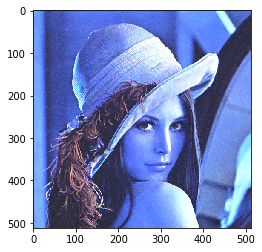

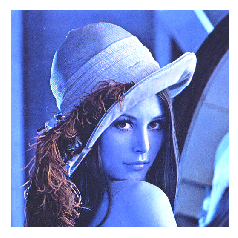

In [5]:

plt.imshow(imgcolor) #Basics
plt.show()

plt.imshow(imgcolor)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
plt.gca().spines['right'].set_color('none') #Hides the border
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.show()

Matplotlib also allows the option of zooming the image and a cursor that gives the value of the pixel it's hovering over. When using this option it's important to remember to use plt.figure(), when not used it will paint over the last figure.
https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1

<IPython.core.display.Javascript object>


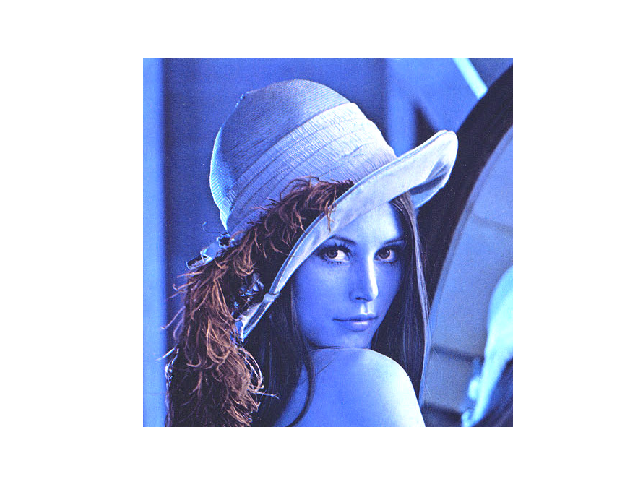

In [34]:
%matplotlib notebook
plt.figure(1)
plt.imshow(imgcolor)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
plt.gca().spines['right'].set_color('none') #Hides the border
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.show()

As we can see the color image is not correct, this is because of the color space used on OpenCV. OpenCV reads color images as BGR (Blue Green Red), whereas matplotlib represents RGB (Red Green Blue). To see the image correctly is necessary to change color spaces.


#### Functions to change color spaces

OpenCV has a function that allows you to change the color space of an image, it's **cvtcolor**. This function has a lot of possible transformations as you can see executing the next cell:


In [6]:
flags = flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

Let's use the color image we have loaded as an example. We want to change it from BGR to RGB so matplotlib can show the image correcty

**Transform a grey scale image to binary**

To go from a color image to gray we can just read de image as a une dimension image with imread, using cvtcolor with the argument COLOR_RGB2GRAY also works.
To go from gray to binary we will use de function Threshold, the documentation for this function is in the next link: 
https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=threshold#cv2.threshold

When choosing the intensity level for the threshold it's important to know what you are going to use this binary image for. This threshold can be chosen manually but, there are also algorithms designed to find the best possible threshold, for example Otsu, these algorithms are also possible arguments for the Threshold function.

It is also important to choose the maxvalue best suited for your image. Normally binary images use the values 0 and 1, so the max value should be 1. 


<IPython.core.display.Javascript object>


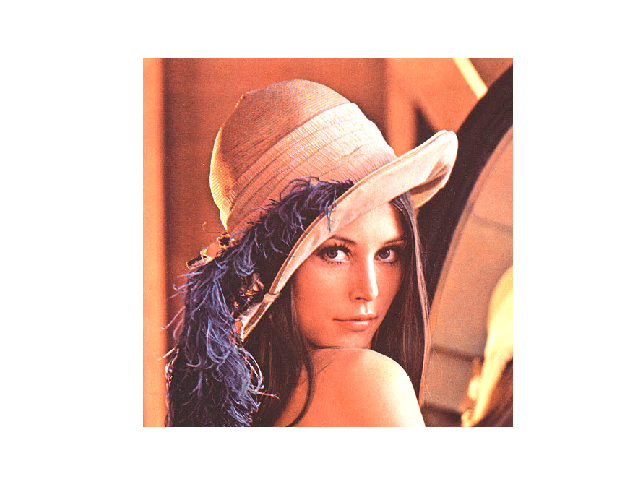

In [35]:
plt.figure(2)
imgRGB = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.xticks([]), plt.yticks([])
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.show()

<IPython.core.display.Javascript object>


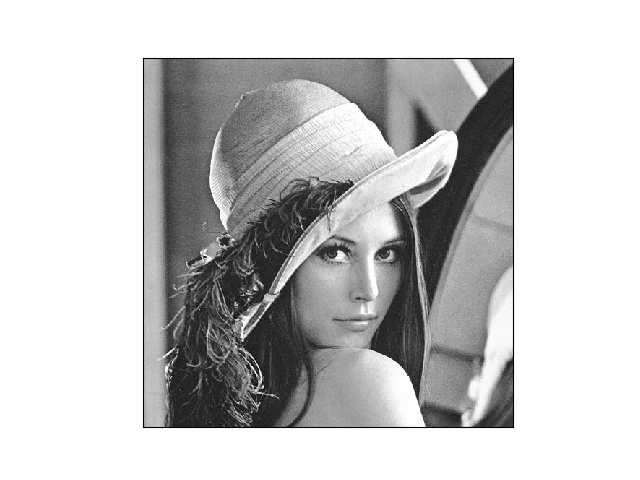

<IPython.core.display.Javascript object>


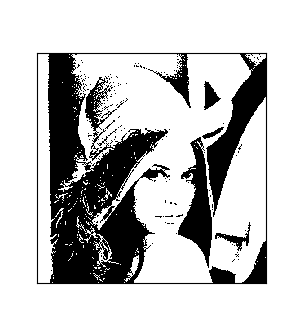

<IPython.core.display.Javascript object>


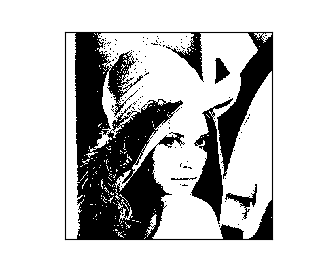

132.0


In [36]:
imggray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
plt.figure('imgray')
plt.imshow(imggray, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

[thresh, imgbi] = cv2.threshold(imggris, 127, 1, cv2.THRESH_BINARY) #with maxvalue 1
plt.figure('threshhold 127')
plt.imshow(imgbi, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

[thresh, imgotsu] = cv2.threshold(imggris, 127, 1, cv2.THRESH_OTSU)
plt.figure('otsu')
plt.imshow(imgotsu, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()
print(thresh)

**From binary to color image**

To go from a binary image to a RGB image first we need to create a color map. A color map is a matrix that assigns RGB values the different intensity leves in our original image. For example a color map for a binary image is 2X3 matrix, since we have 2 original intensity values, if we had a gay scale 8-bit image we would need a 256X3 color map.

To create a color map it's necessary to import the colors from matplotlib, we will be using the function ListedColorMap to create a new color map and apply it to our image.
https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html#matplotlib.colors.ListedColormap

Build manually a color map that makes the white pixels of our image red and the black ones yellow.

More information about color maps:
https://matplotlib.org/api/_as_gen/matplotlib.colors.Colormap.html#matplotlib.colors.Colormap
https://matplotlib.org/tutorials/colors/colormap-manipulation.html


<IPython.core.display.Javascript object>


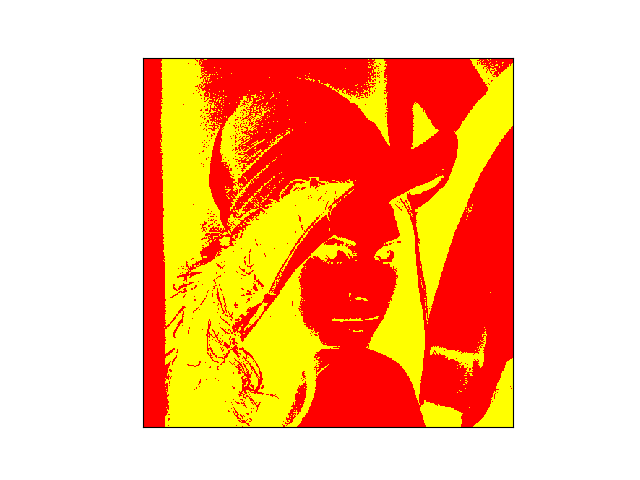

In [38]:
from matplotlib import colors as mpc
color = [[1, 1, 0],
       [1, 0, 0]]

newcmp = mpc.ListedColormap(color)
plt.figure('Colormap')
plt.imshow(imgbi, cmap = newcmp)
plt.xticks([]), plt.yticks([])
plt.show()

**Una imagen RGB pase a una imagen indexada con 255 niveles.**

**Una imagen RGB pase a indexada con 5 niveles.**

**Una imagen de grises pase a imagen indexada con 5 niveles.**

Las imágenes procesadas con OpenCV se pueden almacenar en disco utilizando el comando
imwrite. 

In [21]:
cv2.imwrite('lenagray.png',imggray)
cv2.imwrite('lenabinary.png', imgbi)

plt.imsave('lenaind.png', imgbi, cmap = newcmp)
#imgind = cv2.imread('cutieind.jpg')


**II. Changing the spatial and intensity resolution of an image **

Spatial resolution of an image refers to the number of pixels per row and column. To modify it openCV has the function resize: 
https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#void%20resize(InputArray%20src,%20OutputArray%20dst,%20Size%20dsize,%20double%20fx,%20double%20fy,%20int%20interpolation)

Having the gray image of Lena with it's orginal size being 512X512:
-Resize it to a 256X256 image
-Resize it to a 128X128 image

Show the 3 images side by side to apreciate the difference. Using cv2.imshow() it will be easier to see the difference since the windows will be of a different size each. 

(256, 256)
(128, 128)


<IPython.core.display.Javascript object>


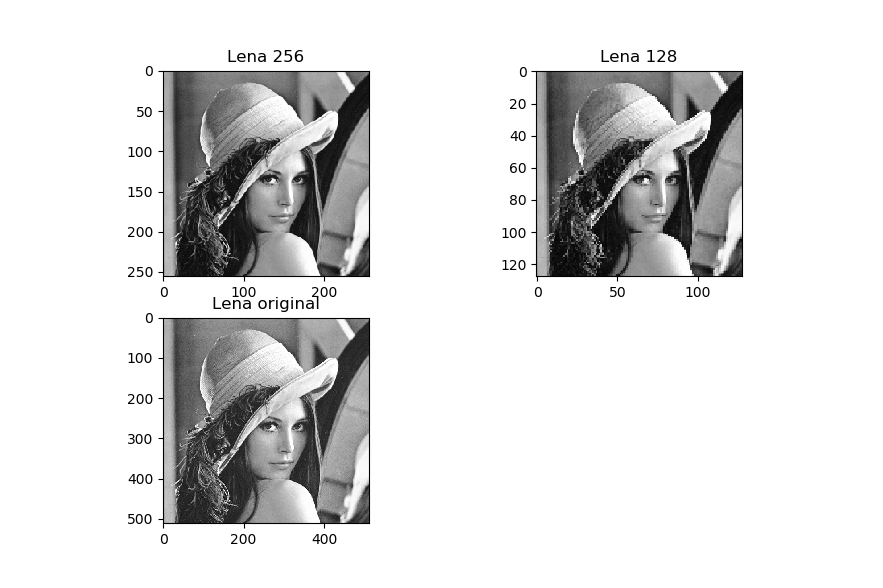

In [23]:
Lena_256 = cv2.resize(imggray, None, fx=0.5, fy=0.5)
print(Lena_256.shape)
Lena_128 = cv2.resize(imggray, None, fx=0.25, fy=0.25)
print(Lena_128.shape)

plt.figure('Spatial Resolution')
plt.subplot(2,2,1)
plt.title('Lena 256')
plt.imshow(Lena_256, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('Lena 128')
plt.imshow(Lena_128, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('Lena original')
plt.imshow(imggray, cmap = 'gray')

plt.show()


In [11]:
cv2.imshow('original',imggray)
cv2.imshow('256',Lena_256)
cv2.waitKey(0)
cv2.destroyAllWindows()

Take the smaller image from the last question and resize it to it's original spatial resolution using different interpolations (nearest and bilinear). The interpolation is the method used by the resize function to stimate the values of the new pixels created by enlarging an image.
Show the 3 images side by side to apreciate the difference.


<IPython.core.display.Javascript object>


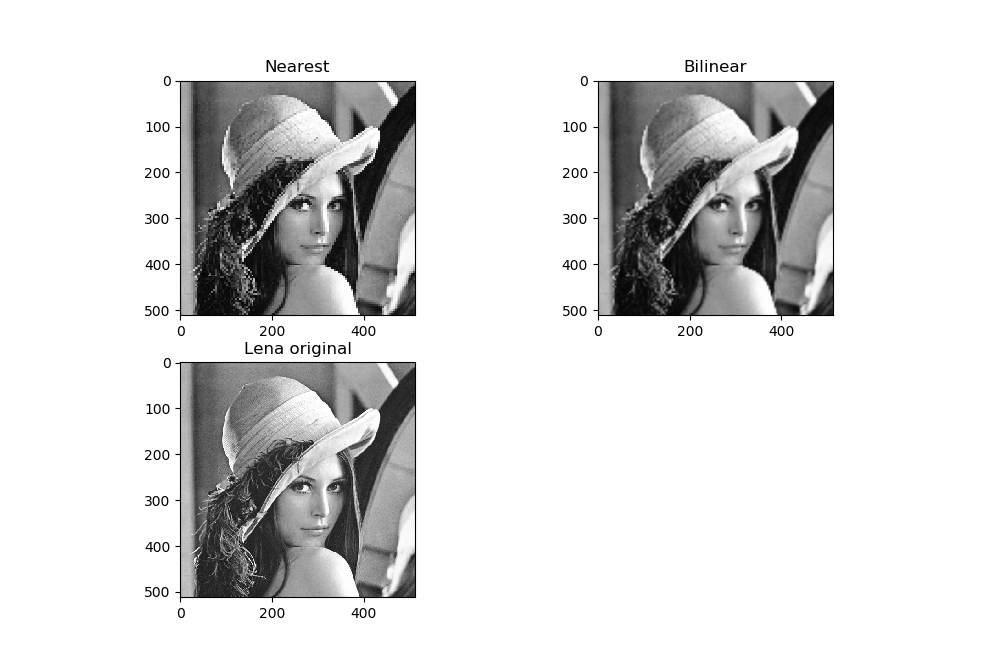

In [26]:
Lena_512a = cv2.resize(Lena_128, None, fx=4, fy=4, interpolation = cv2.INTER_NEAREST)
Lena_512b = cv2.resize(Lena_128, None, fx=4, fy=4) #No hace falta especificar bilineal ya que es la que está por defecto

plt.figure('Resize')
plt.subplot(2,2,1)
plt.title('Nearest')
plt.imshow(Lena_512a, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('Bilinear')
plt.imshow(Lena_512b, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('Lena original')
plt.imshow(imggray, cmap = 'gray')

plt.show()

In [13]:
cv2.imshow('original',imggray)
cv2.imshow('a',Lena_512a)
cv2.imshow('b',Lena_512b)
cv2.waitKey(0)
cv2.destroyAllWindows()

Intensity resolution refers to the number of bits used for each pixel wich marks the number of intemsity levels in an image. A normal gray scale image has 8 bits per pixel. A RGB image has 8 bits per pixel multiplied by 3 for each color.

To change the intensity resolution of our image we will be using basi math applied directly to our image matrix.

-Change the levels of intensity in Lena to 16, 4 and 2 and save them in this variables Lena_512_16, Lena_512_4 y Lena_512_2.


<IPython.core.display.Javascript object>


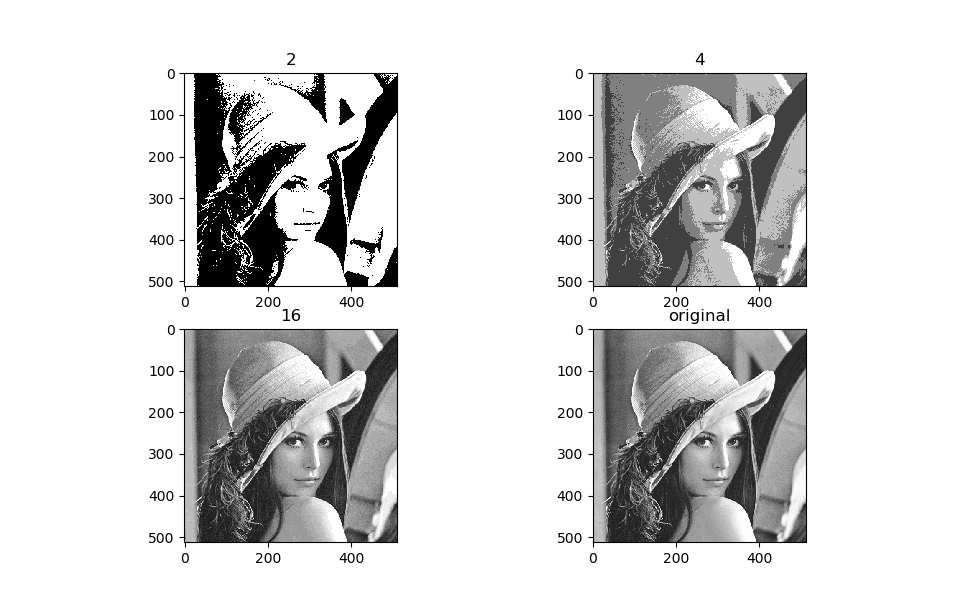

In [28]:

#for 2 lovels we can use threshold
Lena_512_2 = imgotsu

#Para reducir a 4 niveles
temp = imggray/64
temp = np.around(temp)
Lena_512_4 = temp*64


#Para reducir a 16 niveles
temp = imggray/16
temp = np.around(temp)
Lena_512_16 = temp*16

plt.figure('Intensity levels')
plt.subplot(2,2,1)
plt.title('2')
plt.imshow(Lena_512_2, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('4')
plt.imshow(Lena_512_4, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('16')
plt.imshow(Lena_512_16, cmap = 'gray')

plt.subplot(2,2,4)
plt.title('original')
plt.imshow(imggray, cmap = 'gray')

plt.show()

**III. Histograma y mejora de contraste**

https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html

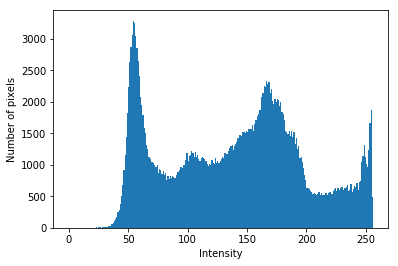

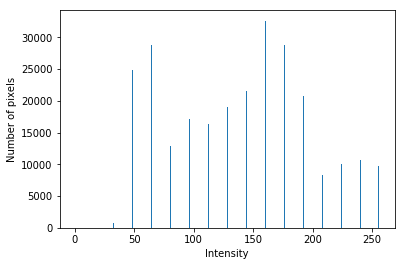

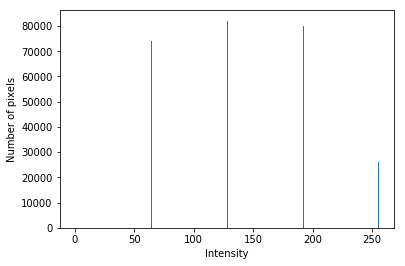

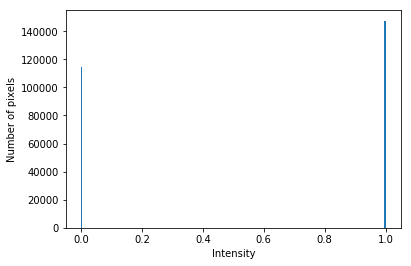

In [15]:
plt.hist(imggray.ravel(),256,[0,256]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()
plt.hist(Lena_512_16.ravel(),256,[0,256]);
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()
plt.hist(Lena_512_4.ravel(),256,[0,256]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()
plt.hist(Lena_512_2.ravel(),255,[0,1]); #In this case the range changes being a binary image
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

Ecualizar el histograma usando la función equalizehist:
https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html?highlight=equalizehist

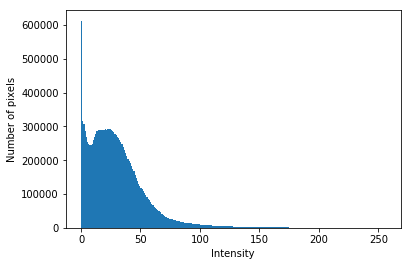

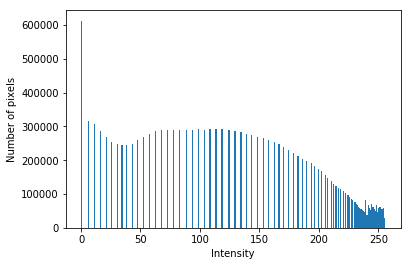

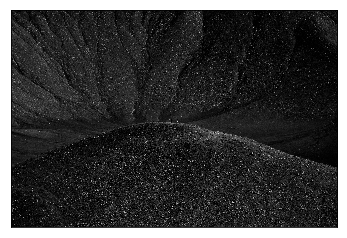

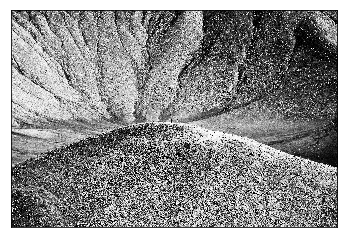

In [21]:
pout = cv2.imread('aerial.jpg', 0)
plt.hist(pout.ravel(),256,[0,256]);
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()
equ = cv2.equalizeHist(pout)
plt.hist(equ.ravel(),256,[0,256]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

plt.imshow(pout, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.show()
plt.imshow(equ, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()



**IV.Interpretación del color y transformaciones puntuales**


uint8
(801, 1297, 3)


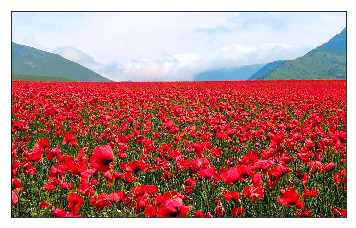

In [17]:
tulips = cv2.imread('tulips.jpg')

print(tulips.dtype)
print(tulips.shape)
tulipsRGB = cv2.cvtColor(tulips, cv2.COLOR_BGR2RGB)
plt.imshow(tulipsRGB)
plt.xticks([]), plt.yticks([])
plt.show()

Obtener el histograma de cada componente R, G, B. Analice y justifique las diferencias
entre los histogramas

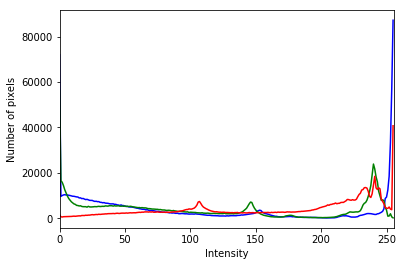

In [22]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([tulips],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

Obtener el negativo de la componente roja y, con ella, volver a componer una imagen RGB y visualizar el resultado. Justifique los cambios de color respecto a la imagen original teniendo en cuenta el modelo de mezcla de colores correspondiente (modelo aditivo).

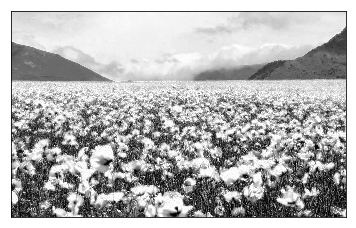

In [19]:
B,G,R = cv2.split(tulips)
plt.imshow(R, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()


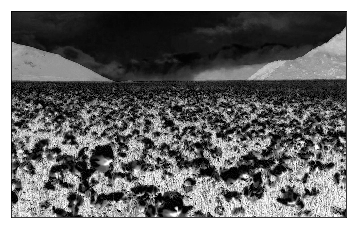

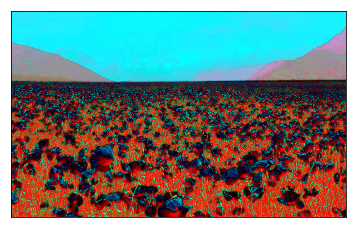

In [20]:
Rinv = 255-R
plt.imshow(Rinv, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

tulipsRGBinv = cv2.merge((Rinv,G,B))
plt.imshow(tulipsRGBinv)
plt.xticks([]), plt.yticks([])
plt.show()

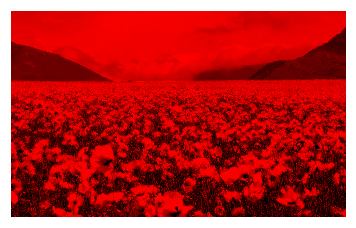

In [27]:
Bnew = np.zeros((801, 1297), np.uint8)
Gnew = np.zeros((801, 1297), np.uint8)
tulipsRGBred = cv2.merge((R,Gnew,Bnew))

plt.imshow(tulipsRGBred)
plt.xticks([]), plt.yticks([])
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.show()